In [1]:
from pyCapsid.pdbutil import getCapsid
pdb = '7kq5'
capsid, calphas, coords, bfactors, title = getCapsid(pdb)

Fetching file 1 / 1 (7kq5)...
Done


C:\Users\colin\miniconda3\envs\fresh_pycapsid\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(
@> 4507 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 195 residues.
@> Biomolecular transformations were applied to the coordinate data.
@> WARNING hybrid36 format is being used


Number Of Residues:  15900
Writing calphas PDB
Writing complete capsid PDB


@> WARNING hybrid36 format is being used


In [2]:
from pyCapsid.ENM import buildENM
kirch, hessian = buildENM(calphas, coords, cutoff=7.5, model='gnm')

[-1. -1. -1. ... -1. -1. -1.]
done constructing matrix


In [3]:
from pyCapsid.NMA import modeCalc
n_modes = 200
eigmethod = 'eigsh'
model = 'gnm'

evals, evecs = modeCalc(kirch, n_modes, eigmethod, model)

Calculating Normal Modes
NMA time:  8.480535507202148


WHAT


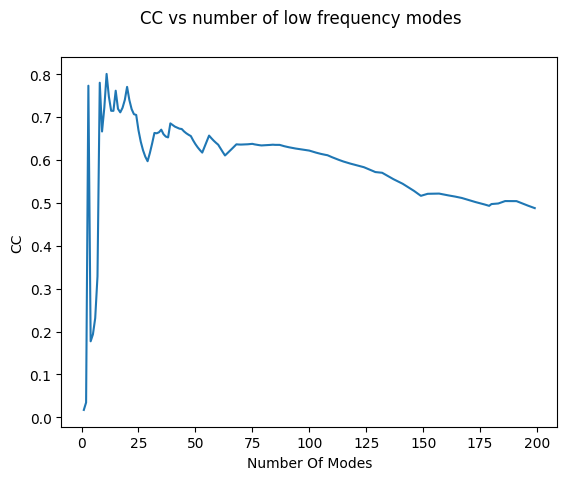

WHAT


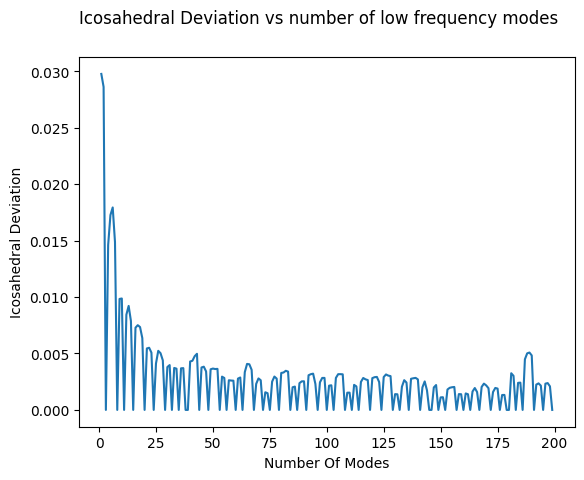

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                15900
Model:                            RLM   Df Residuals:                    15899
Method:                          IRLS   Df Model:                            0
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 22 Dec 2022                                         
Time:                        19:24:08                                         
No. Iterations:                    12                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           753.7836      3.205    235.196      0.0

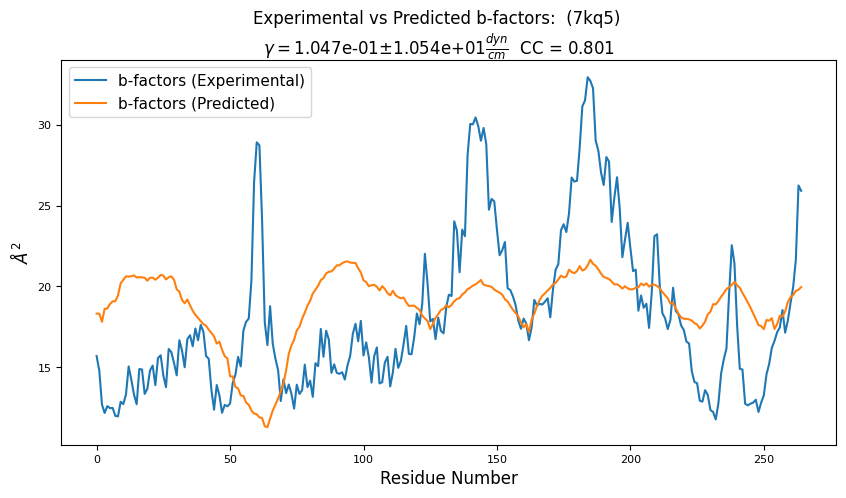

In [4]:
from pyCapsid.bfactorfit import plotBfactors
plotBfactors(evals, evecs, bfactors, pdb, is3d=False, fitModes=True, plotModes=True, forceIco=True, icotol=0.002)

In [5]:
from pyCapsid.mechanical_analysis import calcCovMat, calcDistFlucts
n_modes = 200
fluct_cutoff = 10
covariance = calcCovMat(evals, evecs, n_modes, coords, fluct_cutoff, is3d=False)
print(covariance.data)
dist_flucts = calcDistFlucts(evals, evecs, n_modes, coords, fluct_cutoff, is3d=False)
print(dist_flucts.data)
from pyCapsid.mechanical_analysis import fluctToSims
sims = fluctToSims(dist_flucts.copy())
sims.eliminate_zeros()

200
Direct Calculation Method
[0.08391899 0.11043933 0.08484907 ... 0.13204622 0.13476534 0.13732253]
200
Direct Calculation Method
diag:  [0.11973544 0.11320269 0.1048274  ... 0.13204622 0.13476534 0.13732253]
data:  [0.08391899 0.11043933 0.08484907 ... 0.13204622 0.13476534 0.13732253]
[0.05586385 0.01512475 0.0489243  ... 0.         0.         0.        ]
[0.05586385 0.01512475 0.0489243  ... 0.         0.         0.        ]
RMS distance fluctuations:  0.06939825808978063


(array([    0,     0,     0, ..., 15899, 15899, 15899], dtype=int32), array([  227,  1601,    44, ..., 15846, 15845, 15844], dtype=int32))
(array([    0,     0,     0, ..., 15897, 15898, 15899], dtype=int32), array([  227,  1601,    44, ..., 15897, 15898, 15899], dtype=int32))


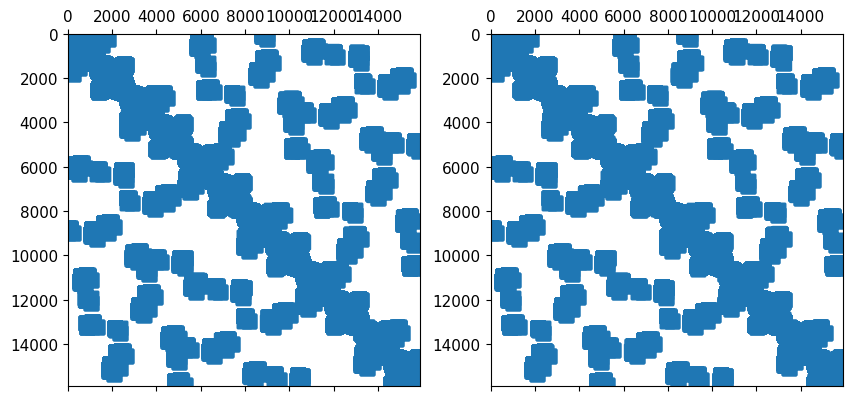

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].spy(dist_flucts)
ax[1].spy(sims)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Plotting Fluctuation Histogram
Plotting


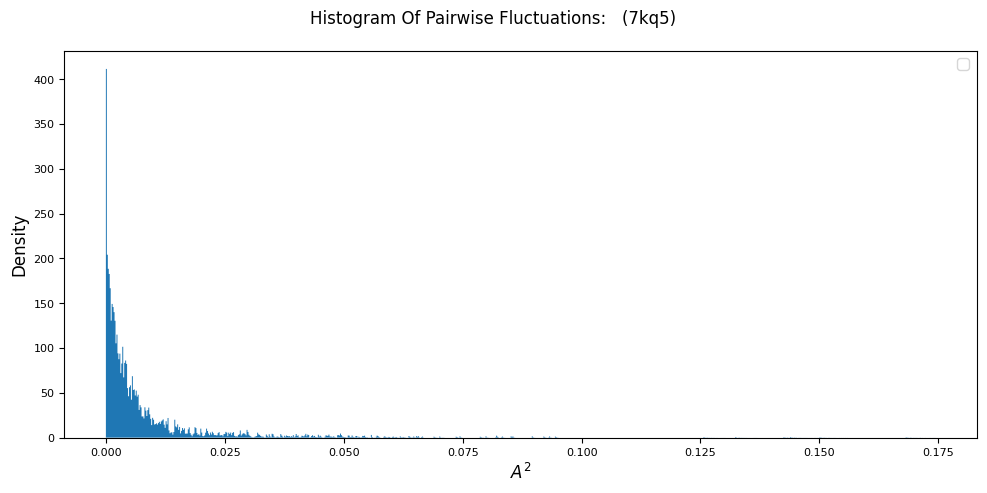

In [7]:
from pyCapsid.mechanical_analysis import fluctPlot
fluctPlot(dist_flucts, ' ', pdb)

In [10]:
from pyCapsid.quasi_rigid_clustering import calcEmbedding, cluster_embedding
from pyCapsid import clustering_util
import numpy as np
n_evecs=130
embedding = calcEmbedding(sims, n_evecs)

nmax = 130
n_range = np.arange(4, nmax, 2)
labels, scores, variances, numtypes = cluster_embedding(n_range, embedding, method='discretize')

Performing Spectral Embedding
(1, array([0, 0, 0, ..., 0, 0, 0]))
Clustering Embedded Points
Clusters: 4
discretize
(4,)
Scoring
Score:  2.7602426658278256
Clusters: 6
discretize
(6,)
Scoring
Score:  4.7551298302925336
Clusters: 8
discretize
(8,)
Scoring
Score:  3.221928094481865
Clusters: 10
discretize
(10,)
Scoring
Score:  3.5036891744343626
Clusters: 12
discretize
(12,)
Scoring
Score:  5.348845011816941
Clusters: 14
discretize
(14,)
Scoring
Score:  3.308262826995774
Clusters: 16
discretize
(16,)
Scoring
Score:  2.6457273005076862
Clusters: 18
discretize
(18,)
Scoring
Score:  2.993251924028448
Clusters: 20
discretize
(20,)
Scoring
Score:  2.801724500009759
Clusters: 22
discretize
(22,)
Scoring
Score:  2.776742006523461
Clusters: 24
discretize
(24,)
Scoring
Score:  2.8765848999710038
Clusters: 26
discretize
(26,)
Scoring
Score:  3.0087836226542257
Clusters: 28
discretize
(28,)
Scoring
Score:  3.320033056596526
Clusters: 30
discretize
(30,)
Scoring
Score:  2.9491589403039273
Clusters: 

C:\Users\colin\miniconda3\envs\fresh_pycapsid\lib\site-packages\pyCapsid\clustering_util.py:82: RuntimeWarning: divide by zero encountered in true_divide
  s = a/b


Some clusters unassigned
Assigned Clusters:  61
(61,)
Scoring
Score:  4.360341231286327
Clusters: 64
discretize
Some clusters unassigned
Assigned Clusters:  61
(61,)
Scoring
Score:  4.517801685895709
Clusters: 66
discretize
(66,)
Scoring
Score:  4.1011325477301614
Clusters: 68
discretize
(68,)
Scoring
Score:  3.907805838352509
Clusters: 70
discretize


C:\Users\colin\miniconda3\envs\fresh_pycapsid\lib\site-packages\pyCapsid\clustering_util.py:82: RuntimeWarning: divide by zero encountered in true_divide
  s = a/b


Some clusters unassigned
Assigned Clusters:  69
(69,)
Scoring
Score:  3.8685827219724014
Clusters: 72
discretize
Some clusters unassigned
Assigned Clusters:  71
(71,)
Scoring
Score:  3.7902656168273943
Clusters: 74
discretize
Some clusters unassigned
Assigned Clusters:  72
(72,)
Scoring
Score:  3.798881072076664
Clusters: 76
discretize
Some clusters unassigned
Assigned Clusters:  73
(73,)
Scoring
Score:  3.837776536017196
Clusters: 78
discretize
Some clusters unassigned
Assigned Clusters:  77
(77,)
Scoring
Score:  4.605390826355404
Clusters: 80
discretize
(80,)
Scoring
Score:  5.286261504001008
Clusters: 82
discretize
Some clusters unassigned
Assigned Clusters:  81
(81,)
Scoring
Score:  4.905612215298186
Clusters: 84
discretize
Some clusters unassigned
Assigned Clusters:  81
(81,)
Scoring
Score:  4.487921883618078
Clusters: 86
discretize
Some clusters unassigned
Assigned Clusters:  81
(81,)
Scoring
Score:  4.267750481992062
Clusters: 88
discretize
Some clusters unassigned
Assigned Clus

C:\Users\colin\miniconda3\envs\fresh_pycapsid\lib\site-packages\pyCapsid\clustering_util.py:82: RuntimeWarning: divide by zero encountered in true_divide
  s = a/b


(116,)
Scoring
Score:  7.312931110089499
Clusters: 118
discretize
(118,)
Scoring
Score:  8.019551555511086
Clusters: 120
discretize
(120,)
Scoring
Score:  8.511976227637643
Clusters: 122
discretize
Some clusters unassigned
Assigned Clusters:  120
(120,)
Scoring
Score:  7.772146042381715
Clusters: 124
discretize
Some clusters unassigned
Assigned Clusters:  120
(120,)
Scoring
Score:  7.310081060313564
Clusters: 126
discretize
Some clusters unassigned
Assigned Clusters:  121
(121,)
Scoring
Score:  6.66200971227703
Clusters: 128
discretize
Some clusters unassigned
Assigned Clusters:  120
(120,)
Scoring
Score:  6.227578427876489


Plotting


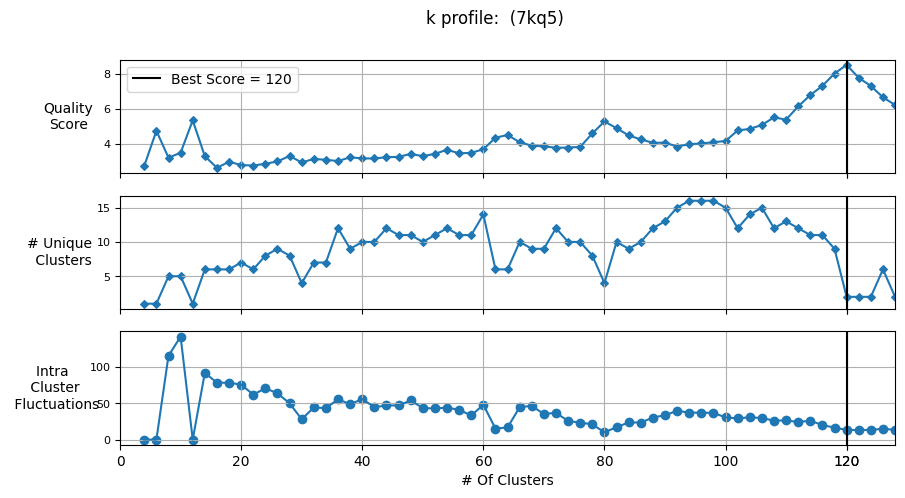

In [11]:
from pyCapsid.clustering_util import plotScores
plotScores(pdb, n_range, scores, variances, numtypes)
clusters = labels[np.argmax(scores)]

In [12]:
class Atom(dict):
    def __init__(self, line):
        self["type"] = line[0:6].strip()
        self["idx"] = line[6:11].strip()
        self["name"] = line[12:16].strip()
        self["resname"] = line[17:20].strip()
        self["resid"] = int(int(line[22:26]))
        self["x"] = float(line[30:38])
        self["y"] = float(line[38:46])
        self["z"] = float(line[46:54])
        self["sym"] = line[76:78].strip()

    def __str__(self):
        line = list(" " * 80)

        line[0:6] = self["type"].ljust(6)
        line[6:11] = self["idx"].ljust(5)
        line[12:16] = self["name"].ljust(4)
        line[17:20] = self["resname"].ljust(3)
        line[22:26] = str(self["resid"]).ljust(4)
        line[30:38] = str(self["x"]).rjust(8)
        line[38:46] = str(self["y"]).rjust(8)
        line[46:54] = str(self["z"]).rjust(8)
        line[76:78] = self["sym"].rjust(2)
        return "".join(line) + "\n"
    
class Molecule(list):
    def __init__(self, file):
        for line in file:
            if "ATOM" in line or "HETATM" in line:
                self.append(Atom(line))

    def __str__(self):
        outstr = ""
        for at in self:
            outstr += str(at)

        return outstr
    
# Colormap taken from stackexchange
def generate_colormap(number_of_distinct_colors: int = 80):
    import math

    import numpy as np
    from matplotlib.colors import ListedColormap
    from matplotlib.cm import hsv

    if number_of_distinct_colors == 0:
        number_of_distinct_colors = 80

    number_of_shades = 7
    number_of_distinct_colors_with_multiply_of_shades = int(math.ceil(number_of_distinct_colors / number_of_shades) * number_of_shades)

    # Create an array with uniformly drawn floats taken from <0, 1) partition
    linearly_distributed_nums = np.arange(number_of_distinct_colors_with_multiply_of_shades) / number_of_distinct_colors_with_multiply_of_shades

    # We are going to reorganise monotonically growing numbers in such way that there will be single array with saw-like pattern
    #     but each saw tooth is slightly higher than the one before
    # First divide linearly_distributed_nums into number_of_shades sub-arrays containing linearly distributed numbers
    arr_by_shade_rows = linearly_distributed_nums.reshape(number_of_shades, number_of_distinct_colors_with_multiply_of_shades // number_of_shades)

    # Transpose the above matrix (columns become rows) - as a result each row contains saw tooth with values slightly higher than row above
    arr_by_shade_columns = arr_by_shade_rows.T

    # Keep number of saw teeth for later
    number_of_partitions = arr_by_shade_columns.shape[0]

    # Flatten the above matrix - join each row into single array
    nums_distributed_like_rising_saw = arr_by_shade_columns.reshape(-1)

    # HSV colour map is cyclic (https://matplotlib.org/tutorials/colors/colormaps.html#cyclic), we'll use this property
    initial_cm = hsv(nums_distributed_like_rising_saw)

    lower_partitions_half = number_of_partitions // 2
    upper_partitions_half = number_of_partitions - lower_partitions_half

    # Modify lower half in such way that colours towards beginning of partition are darker
    # First colours are affected more, colours closer to the middle are affected less
    lower_half = lower_partitions_half * number_of_shades
    for i in range(3):
        initial_cm[0:lower_half, i] *= np.arange(0.2, 1, 0.8/lower_half)

    # Modify second half in such way that colours towards end of partition are less intense and brighter
    # Colours closer to the middle are affected less, colours closer to the end are affected more
    for i in range(3):
        for j in range(upper_partitions_half):
            modifier = np.ones(number_of_shades) - initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i]
            modifier = j * modifier / upper_partitions_half
            initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i] += modifier

    return ListedColormap(initial_cm)

In [13]:
with open(pdb + "_capsid.pdb") as ifile:
    mol = Molecule(ifile)

In [14]:
import numpy as np
print(np.min(clusters))
print('labels: ', clusters.shape)

0
labels:  (15900,)


In [15]:
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=np.min(clusters), vmax=np.max(clusters))
cmap = generate_colormap(int(np.max(clusters)))
print(cmap)
rgba = cmap(norm(clusters))
print(rgba*255)
hexcolor = []
for c in rgba:
    hexcolor.append(mpl.colors.rgb2hex(c))

[[  0.          72.57360629 167.57142857 255.        ]
 [  0.          72.57360629 167.57142857 255.        ]
 [  0.          72.57360629 167.57142857 255.        ]
 ...
 [ 56.66666667 255.          91.81278849 255.        ]
 [ 56.66666667 255.          91.81278849 255.        ]
 [ 56.66666667 255.          91.81278849 255.        ]]


In [16]:
r0 = mol[0]['resid']
c0 = hexcolor[0]
#l0 = clusters[0]
#fullcolors = []
clust_scheme = []
select = '@'
print(r0, c0)
i = 1
j = 0
for at in mol:
    r = at['resid']
    if r == r0:
        select += str(i) + ','
        i += 1
    else:
        clust_scheme.append([c0, select[:-1]])
        select = '@' + str(i) + ','
        r0 = r
        j +=1
        i +=1
        c0 = hexcolor[j]
        l0 = clusters[j]
clust_scheme.append([c0, select[:-1]])

1 #0049a8


In [22]:
import nglview as ngl
file = pdb + '_capsid.pdb'
color_scheme = ngl.color._ColorScheme(clust_scheme, label="scheme_regions")
view = ngl.show_prody(capsid, gui=False)
view.clear_representations()


view.add_representation("cartoon",  color=color_scheme)
view._remote_call("setSize", target='Widget', args=['1000px','1000px'])
view

@> WARNING Indices are exceeding 99999 and hexadecimal format is being used for indices


NGLWidget()